In [1]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
using HDF5
using KernelDensity
using IntervalSets
using Random, ArraysOfArrays
using ValueShapes
using Measurements
using BAT
using DSP

In [35]:
function hist_2d(name, dim_1, dim_2; nbins=40, axmin = true, axmax=true)
    smpl_tmp = bat_read(name)
    smpl_tmp, smpl_w = flatview(smpl_tmp.v), smpl_tmp.weight
    if axmin == true
        hist_tmp = fit(Histogram, (smpl_tmp[dim_1,:],smpl_tmp[dim_2,:]), FrequencyWeights(smpl_w), nbins=nbins)
    else
       hist_tmp = fit(Histogram, (smpl_tmp[dim_1,:],smpl_tmp[dim_2,:]), FrequencyWeights(smpl_w), (range(axmin[1], stop=axmax[1], length=nbins), range(axmin[2], stop=axmax[2], length=nbins))) 
    end
    hist_tmp = normalize(hist_tmp, mode=:pdf) 
    return hist_tmp
end

hist_2d (generic function with 1 method)

In [36]:
filenames_1 = readdir("../../data/sampling_results/Benchmark-5/")
hc_mask = [i[1:3] == "hc-" for i in filenames_1]
lc_mask = [i[1:3] == "lc-" for i in filenames_1]
mask = convert.(Bool, hc_mask .+ lc_mask)
filenames_1 = "../../data/sampling_results/Benchmark-5/" .* filenames_1[mask];

In [37]:
filenames_2 = readdir("../../data/sampling_results/Benchmark-7/")
hc_mask = [i[1:3] == "hc-" for i in filenames_2]
lc_mask = [i[1:3] == "lc-" for i in filenames_2]
mask = convert.(Bool, hc_mask .+ lc_mask)
filenames_2 = "../../data/sampling_results/Benchmark-7/" .* filenames_2[mask];

In [38]:
hists_1_halo = [hist_2d(i, 1,2, axmin=[0.02,0.02], axmax=[0.18,0.18], nbins=200,) for i in filenames_1];

In [39]:
hists_1_core = [hist_2d(i, 3,4, axmin=[0.02,0.02], axmax=[0.18,0.18], nbins=200,) for i in filenames_1];

In [40]:
hists_2_halo = [hist_2d(i, 1,2, axmin=[0.02,0.02], axmax=[0.18,0.18], nbins=200,) for i in filenames_2];

In [41]:
hists_2_core = [hist_2d(i, 3,4, axmin=[0.02,0.02], axmax=[0.18,0.18], nbins=200,) for i in filenames_2];

In [43]:
weights_1_halo = zeros(size(hists_1_halo[1].weights'))
weights_1_core = zeros(size(hists_1_core[1].weights'))
weights_2_halo = zeros(size(hists_2_halo[1].weights'))
weights_2_core = zeros(size(hists_2_core[1].weights'))

for i in eachindex(hists_1_halo)
    weights_1_halo = weights_1_halo .+ hists_1_halo[i].weights'
    weights_1_core = weights_1_core .+ hists_1_core[i].weights'
    weights_2_halo = weights_2_halo .+ hists_2_halo[i].weights'
    weights_2_core = weights_2_core .+ hists_2_core[i].weights'
end

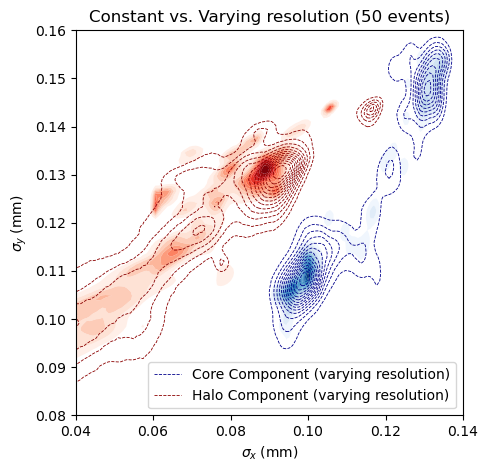

PyObject Text(29.299999999999997, 0.5, '$\\sigma_y \\; (\\mathrm{mm})$')

In [78]:
fig, ax= plt.subplots(1,1, figsize=(5,5),)

ax.contourf(
    midpoints(hists_1_halo[1].edges[1]), 
    midpoints(hists_1_halo[1].edges[2]), 
    weights_1_halo, 
    levels=range(minimum(weights_1_halo), maximum(weights_1_halo), length=15)[2:end], 
    cmap="Reds", 
    alpha=1, 
    antialiased=true
    ) 

ax.contour(
    midpoints(hists_2_halo[1].edges[1]), 
    midpoints(hists_2_halo[1].edges[2]), 
    weights_2_halo, 
    levels=range(minimum(weights_2_halo), maximum(weights_2_halo), length=15)[2:end], 
    colors="darkred", 
    alpha=1, 
    linewidths=0.6,
    linestyles="dashed",
    antialiased=true
    ) 

ax.contourf(
    midpoints(hists_1_core[1].edges[1]), 
    midpoints(hists_1_core[1].edges[2]), 
    weights_1_core, 
    levels=range(minimum(weights_1_core), maximum(weights_1_core), length=15)[2:end], 
    cmap="Blues", 
    alpha=1, 
    antialiased=true
    ) 

ax.contour(
    midpoints(hists_2_core[1].edges[1]), 
    midpoints(hists_2_core[1].edges[2]), 
    weights_2_core, 
    levels=range(minimum(weights_2_core), maximum(weights_2_core), length=15)[2:end], 
    colors="darkblue", 
    alpha=1, 
    linewidths=0.6,
    linestyles="dashed",
    antialiased=true
    ) 

ax.plot([1,2,3], [1,2,3], ls="dashed", color="darkblue", alpha=1, linewidth=0.6, label="Core Component (varying resolution)")
ax.plot([1,2,3], [1,2,3], ls="dashed", color="darkred", alpha=1, linewidth=0.6, label="Halo Component (varying resolution)")

ax.set_xlim(0.04, 0.14)
ax.set_ylim(0.08, 0.16)

ax.legend(loc="lower right")

ax.set_title("Constant vs. Varying resolution (50 events)")

ax.set_xlabel(L"\sigma_x \; (\mathrm{mm})")
ax.set_ylabel(L"\sigma_y \; (\mathrm{mm})")